In [48]:
# Gọi thư viện
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import json
import requests
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

In [31]:
# Load data
df = pd.read_csv('data/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [32]:
# Kiểm tra null values
print("Nulls")
print("=====")
print(df.isnull().sum())

Nulls
=====
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [33]:
# Kiểm tra các giá trị 0
print("0s")
print("==")
print(df.eq(0).sum())

0s
==
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [34]:
# Thay giá trị 0 với NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] = \
    df[['Glucose', 'BloodPressure','SkinThickness',
        'Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,np.NaN)
    
df.fillna(df.mean(), inplace=True) # Thay NaN với giá trị mean

print(df.eq(0).sum())

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [35]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.056027,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.420157,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.072517,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.158139,0.542398,0.100966,0.127872,0.215299
Insulin,0.056027,0.420157,0.072517,0.158139,1.000000,0.166586,0.098634,0.136734,0.214411
BMI,0.021565,0.230941,0.281268,0.542398,0.166586,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.098634,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.136734,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.214411,0.311924,0.173844,0.238356,1.000000


C:\Users\tien2\AppData\Local\Temp\ipykernel_18820\381708263.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df.columns)


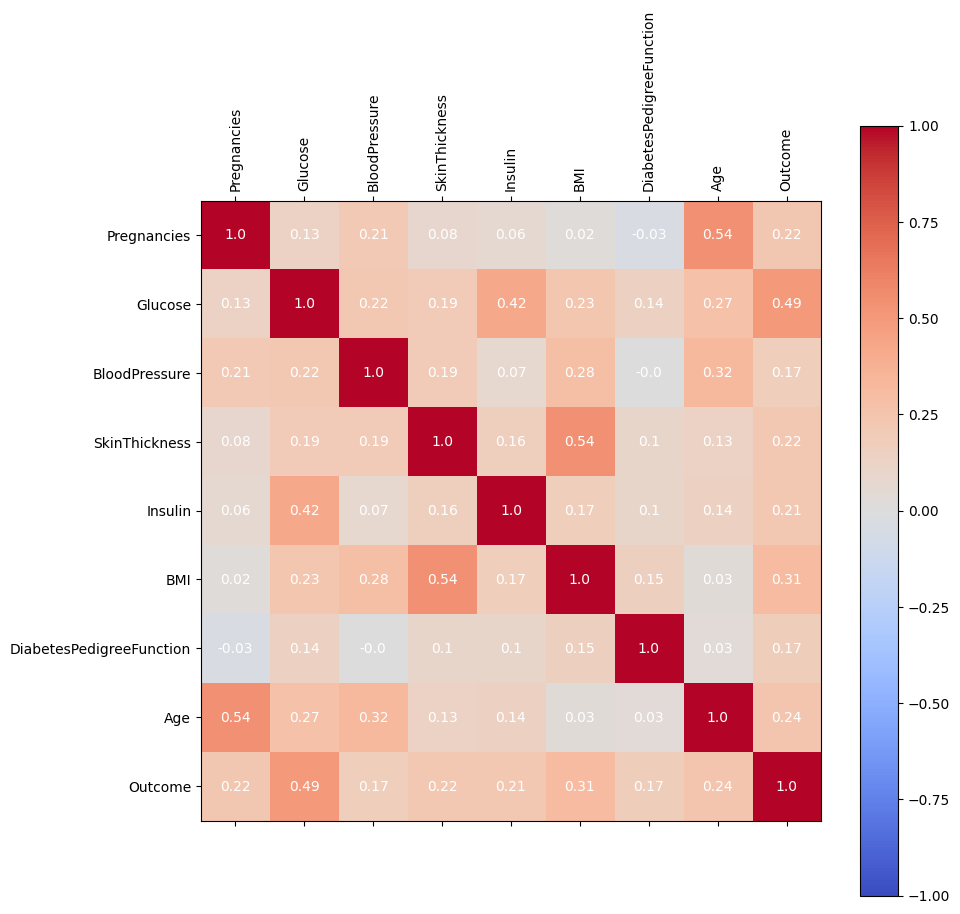

In [36]:
# Tạo một hình vẽ và trục để hiển thị ma trận tương quan
fig, ax = plt.subplots(figsize=(10, 10))

# Vẽ ma trận tương quan dưới dạng một biểu đồ màu
cax = ax.matshow(corr, cmap="coolwarm", vmin=-1, vmax=1)

# Thêm thanh màu cho biểu đồ để hiển thị giá trị tương quan
fig.colorbar(cax)

# Xác định các điểm đánh dấu trên trục X
ticks = np.arange(0, len(df.columns), 1)
ax.set_xticks(ticks)

# Đặt nhãn cho các điểm đánh dấu trên trục X
ax.set_xticklabels(df.columns)

# Xoay nhãn trục X để tránh trùng lắp
plt.xticks(rotation=90)

# Đặt nhãn cho các điểm đánh dấu trên trục Y
ax.set_yticklabels(df.columns)

# Xác định các điểm đánh dấu trên trục Y
ax.set_yticks(ticks)

# In giá trị tương quan lên trên biểu đồ
for i in range(df.shape[1]):
    for j in range(9):
        text = ax.text(
            j, i, round(corr.iloc[i, j], 2), ha="center", va="center", color="w"
        )

# Hiển thị biểu đồ ma trận tương quan
plt.show()

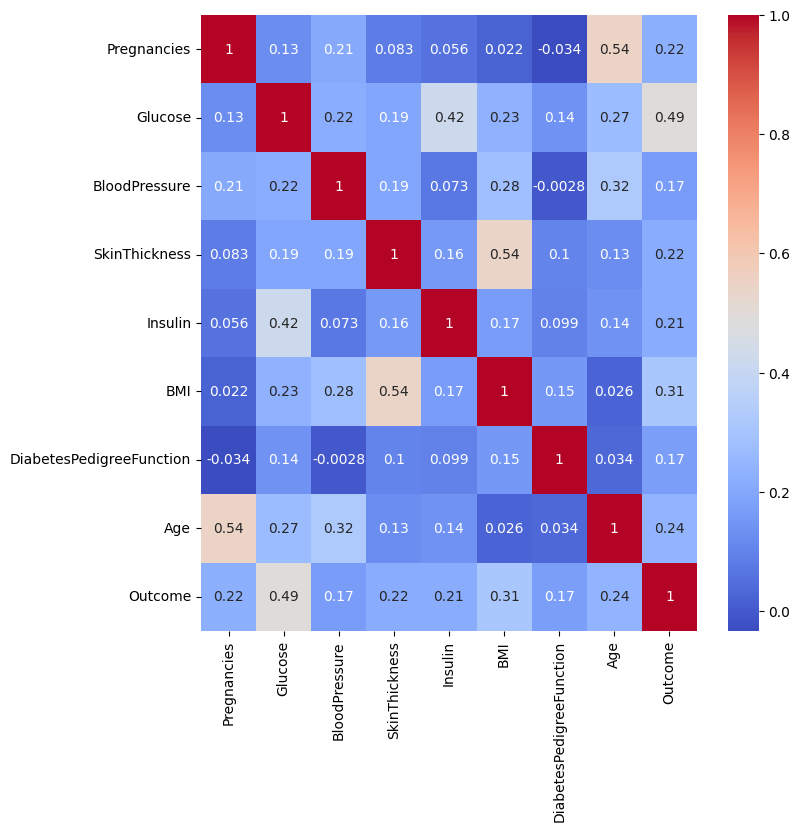

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo biểu đồ heatmap của ma trận tương quan (correlation) của DataFrame 'df'
# annot=True: Hiển thị giá trị tương quan trên biểu đồ
# cmap='coolwarm': Sử dụng màu sắc từ bản đồ màu 'coolwarm'
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

# --- Lấy tham chiếu đến hình hiện tại và thiết lập kích thước của nó ---
fig = plt.gcf()  # Lấy tham chiếu đến hình (figure) hiện tại
fig.set_size_inches(8, 8)  # Thiết lập kích thước của hình là 8x8 inches

In [38]:
print(df.corr().nlargest(4, 'Outcome').values[:,8])

[1.         0.49292767 0.31192439 0.23835598]


In [39]:
# --- Đặc trưng ---
# Chọn các đặc trưng cần sử dụng trong X, trong trường hợp này, chúng ta chọn 'Glucose', 'BMI', 'Age'.
X = df[['Glucose', 'BMI', 'Age']]

# --- Nhãn ---
# Lấy nhãn từ cột thứ 8 của dataframe và lưu vào biến y.
y = df.iloc[:, 8]

# Tạo một mô hình Logistic Regression
log_reg = linear_model.LogisticRegression()

# Sử dụng phương pháp Cross-validation với 10 fold (chia dữ liệu thành 10 phần) để tính độ chính xác trung bình (mean).
# Chúng ta sử dụng 'accuracy' để đánh giá độ chính xác của mô hình.
log_reg_score = cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean()

# In kết quả độ chính xác của mô hình Logistic Regression
print("Logistic Regression score: ", log_reg_score)

# Tạo một danh sách (list) để lưu trữ kết quả của các mô hình khác (nếu có).
result = []
result.append(log_reg_score)


Logistic Regression score:  0.7669856459330144


In [49]:
#---danh sách trống sẽ chứa điểm số của các lần kiểm tra chéo (cross-validation)---
cv_scores = []

#---số lượng fold (phân chia dữ liệu thành các tập con)---
folds = 10

#---tạo danh sách các giá trị K lẻ cho thuật toán K-Nearest Neighbors (KNN)---
ks = list(range(1, int(len(X) * ((folds - 1) / folds)), 2))

#---thực hiện kiểm tra chéo K-fold---
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=folds, scoring='accuracy').mean()
    cv_scores.append(score)

#---lấy điểm số cao nhất---
knn_score = max(cv_scores)

#---tìm giá trị K tối ưu cho kết quả điểm số cao nhất---
optimal_k = ks[cv_scores.index(knn_score)]
print(f"The optimal number of neighbors is {optimal_k}")
print(knn_score)
result.append(knn_score)


c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    i

The optimal number of neighbors is 19
0.7721462747778537


c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\model_selection\_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\metrics\_scorer.py", line 136, in __call__
    score = scorer._score(
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\utils\_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
  File "c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    i

In [41]:
# Tạo một mô hình Support Vector Machine (SVM) sử dụng kernel tuyến tính
linear_svm = svm.SVC(kernel='linear')

# Sử dụng phương pháp cross-validation với 10-fold cross-validation để đánh giá hiệu suất của mô hình
# X là dữ liệu đầu vào, y là nhãn tương ứng
# Scoring='accuracy' là phương thức đánh giá dựa trên độ chính xác
linear_svm_score = cross_val_score(linear_svm, X, y, cv=10, scoring='accuracy').mean()

# In ra điểm số của mô hình SVM tuyến tính
print("Linear SVM Score: ", linear_svm_score)

# Thêm điểm số của mô hình SVM tuyến tính vào danh sách kết quả
result.append(linear_svm_score)


Linear SVM Score:  0.7656527682843473


In [42]:
rbf = svm.SVC(kernel='rbf')
rbf_score = cross_val_score(rbf, X, y, cv=10, scoring='accuracy').mean()
print("RBF SVM score: ", rbf_score)
result.append(rbf_score)

RBF SVM score:  0.765704032809296


In [43]:
algorithms = ['Logistic Regression', 'KNN', 'Linear SVM', 'RBF SVM']
cv_mean = pd.DataFrame(result, index=algorithms)
cv_mean.columns=['Accuracy']
cv_mean.sort_values(by='Accuracy', ascending=False)

,Accuracy
KNN,0.772146
Logistic Regression,0.766986
RBF SVM,0.765704
Linear SVM,0.765653


In [44]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X, y)

# --- Save the model ---
filename = 'diabetes.sav'

# --- Write to the file using write and binary mode ---
pickle.dump(knn, open(filename, 'wb'))

# --- Load the model ---
loaded_model = pickle.load(open(filename, 'rb'))

In [45]:
Glucose = 150
BMI = 500
Age = 50

prediction = loaded_model.predict([[Glucose, BMI, Age]])
print(prediction)
if(prediction == 0):
  print("No diabetes")
else:
  print("Diabetes")
  
proba = loaded_model.predict_proba([[Glucose, BMI, Age]])
print(proba)
print("Confidence: ", str(round(np.amax(proba[0]) * 100, 2)) + "%")

[1]
Diabetes
[[0.21052632 0.78947368]]
Confidence:  78.95%


c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\tien2\miniconda3\envs\intel\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [51]:
def predict_diabetes(BMI, Age, Glucose):
  url = 'http://127.0.0.1:5000/diabetes/v1/predict'
  data = {"BMI":BMI, "Age":Age, "Glucose":Glucose}
  data_json = json.dumps(data)
  headers = {'Content-type':'application/json'}
  response = requests.post(url, data=data_json, headers=headers)
  result = json.loads(response.text)
  return result
if __name__ == "__main__":
  predictions = predict_diabetes(100,10,150)
  print("Diabetic" if predictions["prediction"] == 1 else "Not Diabetic")
  print("Confidence: " + predictions["confidence"] + "%")

Diabetic
Confidence: 68.42%
